<font color="black" size="6" style="font-family:sans-serif">EMPLOYEE ATTRITION PREDICTION ANALYSIS</font>
<br>
<img src="./image/attrition.jpg" style="width: 500px;margin-left:200px"/>

# Introduction and Overview

<B>What Is Employee Attrition Rate?</B><BR>
Attrition measures how many people left a company/office/department compared to the average number of people employed in that year. This takes into account fresh hires as well. 

Here’s a simple formula to help you calculate attrition:
Conduct a headcount to know how many employees you started with at the beginning of the year. Let’s say this number is 1,000.
Keep track of how many people leave throughout the year. Let’s say 200 employees left the company due to voluntary and involuntary reasons.
Keep track of the employees you hire across the year, and conduct a final headcount at year-end. Let’s say that you hired 400 people that year – this means your final headcount is 1,400.
Now, calculate the average number of employees for that year. In our example, this will be (1000+1400)/2 = 1,200.
Finally, calculate the number of employees who left as a percentage of the average number of employees. This will give you the attrition rate: (200/1200) x 100 = 16.66%.
Simply put,

<B>Attrition Rate = <font color="red">Number of Attritions/Average Number of Employees x 100</font></B>


## Types of Attrition
1. <b>Retirement</b> - <font color="green">Positive</font><br>

2. <b>Voluntary attrition</b> - <font color="red">Negative</font><br>
    Where employees decide to simply quit their jobs.

3. <b>Involuntary attrition</b> - <font color="green">Positive</font><br>
    It is the company and not the employee that initiates the exit.

4. <b>Internal attrition</b> - <font color="green">Positive</font>/<font color="red">Negative</font><br>
    Employees are quitting their jobs in one department to join another department.

5. <b>Demographic-specific attrition</b> - <font color="red">Negative</font><br>
    This is a significant concern for progressive companies trying to build an equal-opportunities workplace.      Demographic-specific attrition means that employees from a single group – women, ethnic minorities, people with disabilities, veterans, or older professionals – are leaving the company in droves.<br>
    

<B><font color="red">Negative attrition implies a larger, more serious problem within an organization.</font></B><br> 
<B>--------------------------------------------------------------------------------------------------------------------------------------------------------------------</B>

# Problem Statement
Building model to predict in future negative attrition. 

# Core Business Problem being solved?
To Reduce Iteration Rate

# Stakeholder
Company Management

# Bussiness Metric
Attrition rate
# Data Science Metric
Confusion Matrix<br>
Recall

# EDA

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from matplotlib import pyplot

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 

from collections import Counter
from imblearn.under_sampling import NearMiss


In [3]:
hr_df= pd.read_csv("./data/attrition.csv")
hr_df.shape

(1470, 35)

In [659]:
hr_df.head().transpose()

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


| Feature | CRITICAL | IMP | NOT IMP |
| --- | --- | --- | --- |
| Age | - | YES | - |
| Attrition | YES | - | - |
| BusinessTravel | - | YES | - |
| DailyRate | NOT | SURE | - |
| Department | - | YES | - |
| DistanceFromHome | - | - | YES |
| Education | - | YES | - |
| EducationField | - | YES | - |
| EmployeeCount | - | - | YES |
| EmployeeNumber | - | - | YES |
| EnvironmentSatisfaction | YES | - | - |
| Gender | - | YES | - |
| HourlyRate | NOT | SURE | - |
| JobInvolvement | YES | - | - |
| JobLevel | - | YES | - |
| JobRole | - | YES | - |
| JobSatisfaction | YES | - | - |
| MaritalStatus | - | YES | - |
| MonthlyIncome | YES | - | - |
| MonthlyRate | NOT | SURE | - |
| NumCompaniesWorked | YES | - | - |
| Over18 | - | - | YES |
| OverTime | - | YES | - |
| PercentSalaryHike | YES | - | - |
| PerformanceRating | YES | - | - |
| RelationshipSatisfaction | - | YES | - |
| StandardHours | - | - | YES |
| StockOptionLevel | - | YES | - |
| TotalWorkingYears | - | YES | - |
| TrainingTimesLastYear | - | YES | - |
| WorkLifeBalance | YES | - | - |
| YearsAtCompany | - | YES | - |
| YearsInCurrentRole | - | YES | - |
| YearsSinceLastPromotion | YES | - | - |
| YearsWithCurrManager | - | YES | - |


In [660]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [661]:
#Categorical vs Nemrical Count
cat_numeric_details(hr_cat_df)

Total Numerical Coulmns :  26 

Numerical Coulmns :  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Total Categorical Coulmns :  9 

Categorical Coulmns :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [662]:
hr_df.describe()
#YearsAtCompany

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [663]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

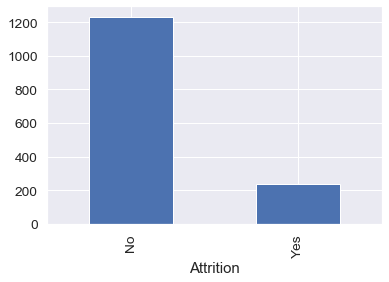

In [664]:
#DATA IS BIASED OR NOT
hr_df.groupby('Attrition')['Attrition'].agg('count').plot.bar()

## Column distribution

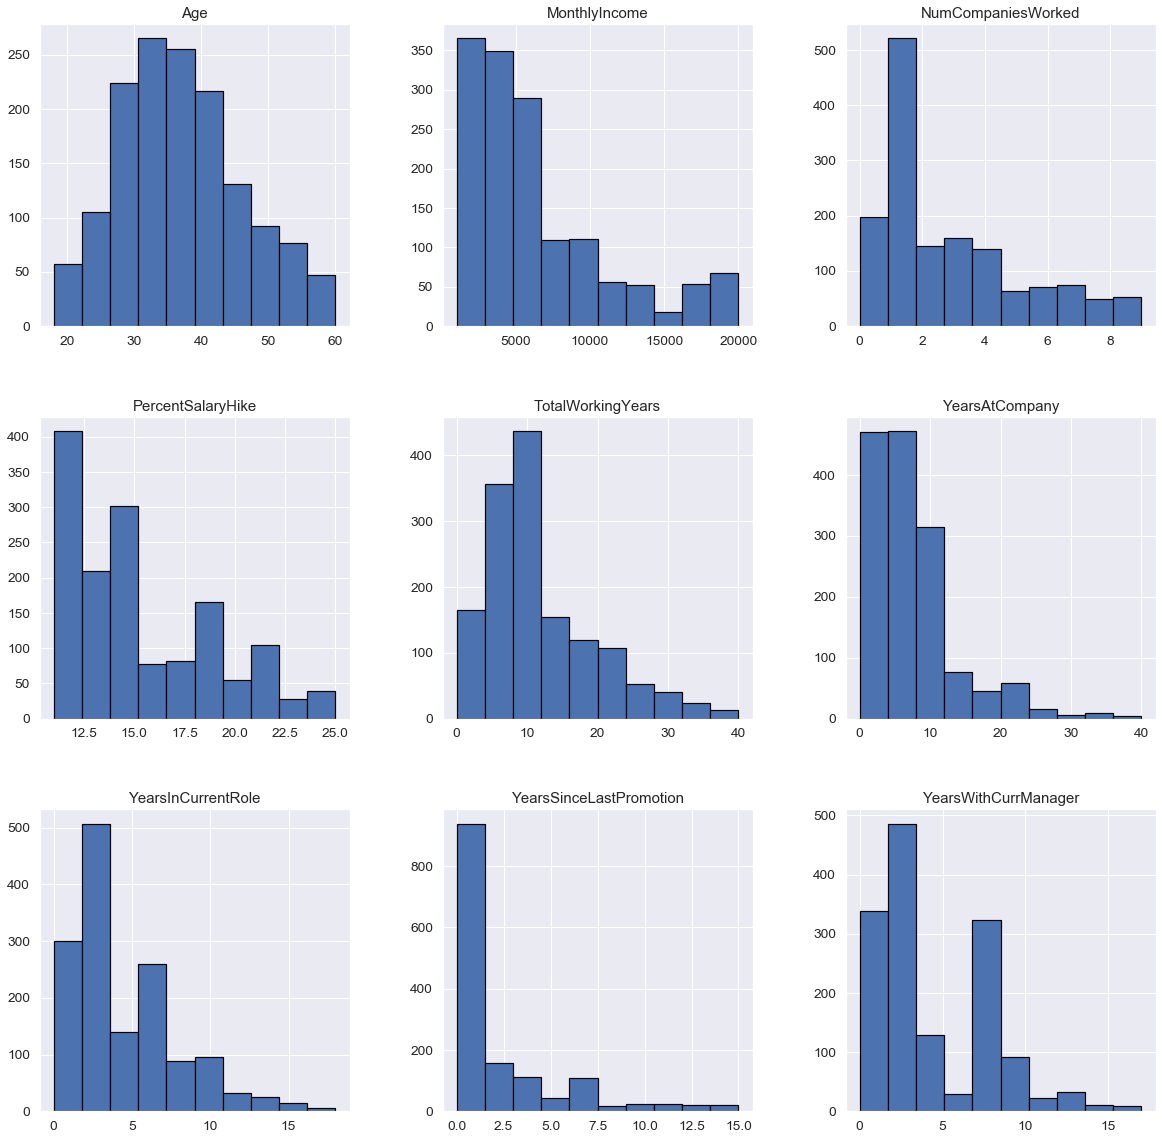

In [665]:
# Visulazing the distibution of the data for every feature
hr_df[['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', \
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', \
       'YearsWithCurrManager']].hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

## Attrition rate based on gender.

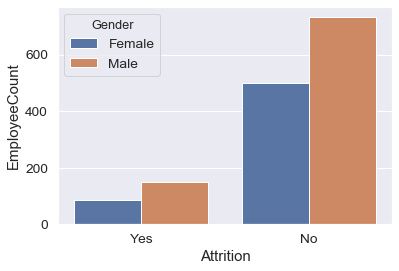

In [666]:
sns.barplot(x='Attrition', y='EmployeeCount' , data = hr_df, \
            estimator = np.sum, hue = hr_df['Gender'])

In [667]:
attr_male_perc = np.sum((hr_df.Gender == 'Male') & \
                           (hr_df.Attrition == 'Yes'))/(np.sum((hr_df.Gender == 'Male')))
attr_female_perc = np.sum((hr_df.Gender == 'Female') & \
                           (hr_df.Attrition == 'Yes'))/ (np.sum((hr_df.Gender == 'Female')))

print("Attrition Rate in Male cadidates amongst Male : ", round(attr_male_perc*100, 2), "%")
print("Attrition Rate in FeMale cadidates amongst Female: ", round(attr_female_perc*100, 2), "%")

Attrition Rate in Male cadidates amongst Male :  17.01 %
Attrition Rate in FeMale cadidates amongst Female:  14.8 %


## Attrition rate based on BusinessTravel.

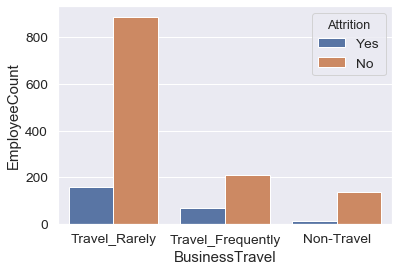

In [668]:
sns.barplot(x = hr_df['BusinessTravel'] , y = hr_df['EmployeeCount'], \
            estimator = np.sum, hue = hr_df['Attrition'])

In [669]:
attr_travel_rare = np.sum((hr_df.BusinessTravel == 'Travel_Rarely') & \
                           (hr_df.Attrition == 'Yes'))/(np.sum((hr_df.BusinessTravel == 'Travel_Rarely')))
attr_travel_freq = np.sum((hr_df.BusinessTravel == 'Travel_Frequently') & \
                           (hr_df.Attrition == 'Yes'))/ (np.sum((hr_df.BusinessTravel == 'Travel_Frequently')))
attr_travel_non = np.sum((hr_df.BusinessTravel == 'Non-Travel') & \
                           (hr_df.Attrition == 'Yes'))/ (np.sum((hr_df.BusinessTravel == 'Non-Travel')))


print("Attrition Rate who travel freq : ", round(attr_travel_freq*100, 2), "%")
print("Attrition Rate who travel rare : ", round(attr_travel_rare*100, 2), "%")
print("Attrition Rate who does not travel : ", round(attr_travel_non*100, 2), "%")


Attrition Rate who travel freq :  24.91 %
Attrition Rate who travel rare :  14.96 %
Attrition Rate who does not travel :  8.0 %


## Attrition rate based on Education Field

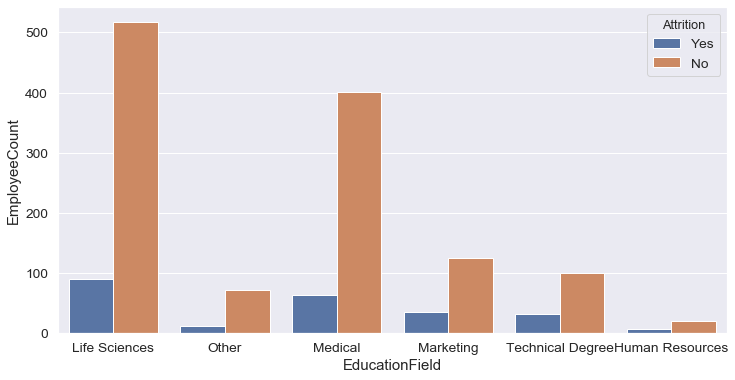

In [670]:
plt.figure(figsize=(12,6))
sns.barplot(x=hr_df['EducationField'], y = hr_df['EmployeeCount'], \
            estimator = np.sum, hue = hr_df['Attrition'])

In [671]:
def get_attrition_percentage(df, columnName, fields):
    for field in fields:
        perc_val = np.sum((df[columnName] == field) & (df.Attrition == 'Yes'))/np.sum(df[columnName] == field)
        print(" Attrition Rate Column :",columnName," field : ", field, "Percentage : ", \
              round(perc_val*100, 2), "%")
        


In [672]:
get_attrition_percentage(hr_df, 'EducationField', hr_df.EducationField.unique())


 Attrition Rate Column : EducationField  field :  Life Sciences Percentage :  14.69 %
 Attrition Rate Column : EducationField  field :  Other Percentage :  13.41 %
 Attrition Rate Column : EducationField  field :  Medical Percentage :  13.58 %
 Attrition Rate Column : EducationField  field :  Marketing Percentage :  22.01 %
 Attrition Rate Column : EducationField  field :  Technical Degree Percentage :  24.24 %
 Attrition Rate Column : EducationField  field :  Human Resources Percentage :  25.93 %


## Attrition rate based on Department.

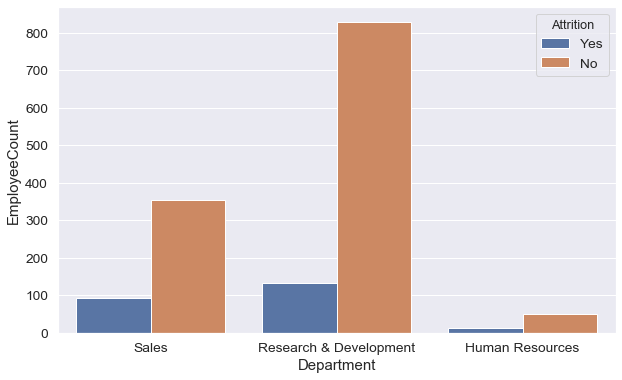

In [673]:
plt.figure(figsize=(10,6))
sns.barplot(x=hr_df['Department'], y = hr_df['EmployeeCount'], \
            estimator = np.sum, hue = hr_df['Attrition'])

In [674]:
get_attrition_percentage(hr_df, 'Department', hr_df.Department.unique())

 Attrition Rate Column : Department  field :  Sales Percentage :  20.63 %
 Attrition Rate Column : Department  field :  Research & Development Percentage :  13.84 %
 Attrition Rate Column : Department  field :  Human Resources Percentage :  19.05 %


## Attrition rate based on Job Role.

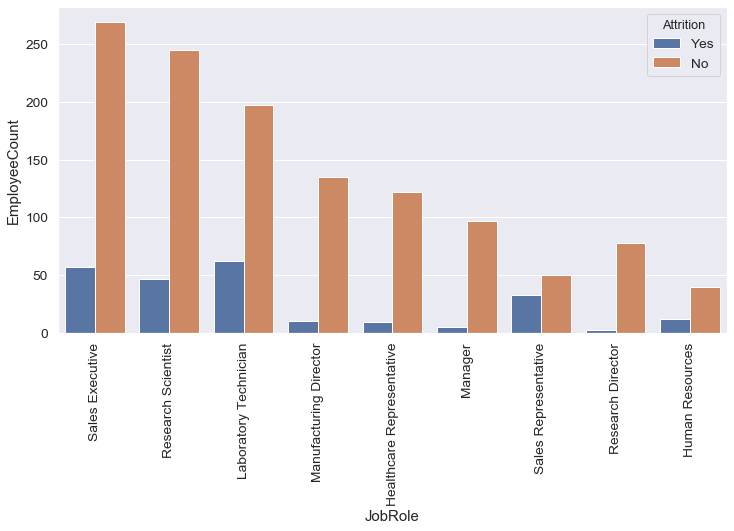

In [675]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x = hr_df['JobRole'], y = hr_df['EmployeeCount'], \
            estimator = np.sum, hue = hr_df['Attrition'])

In [676]:
get_attrition_percentage(hr_df, 'JobRole', hr_df.JobRole.unique())

 Attrition Rate Column : JobRole  field :  Sales Executive Percentage :  17.48 %
 Attrition Rate Column : JobRole  field :  Research Scientist Percentage :  16.1 %
 Attrition Rate Column : JobRole  field :  Laboratory Technician Percentage :  23.94 %
 Attrition Rate Column : JobRole  field :  Manufacturing Director Percentage :  6.9 %
 Attrition Rate Column : JobRole  field :  Healthcare Representative Percentage :  6.87 %
 Attrition Rate Column : JobRole  field :  Manager Percentage :  4.9 %
 Attrition Rate Column : JobRole  field :  Sales Representative Percentage :  39.76 %
 Attrition Rate Column : JobRole  field :  Research Director Percentage :  2.5 %
 Attrition Rate Column : JobRole  field :  Human Resources Percentage :  23.08 %


## attrition based on Marital Status

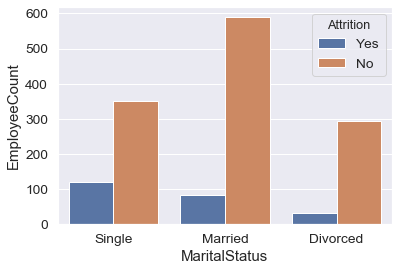

In [677]:
sns.barplot(x = hr_df['MaritalStatus'], y = hr_df['EmployeeCount'], \
            estimator = np.sum, hue = hr_df['Attrition'] )

In [678]:
get_attrition_percentage(hr_df, 'MaritalStatus', hr_df.MaritalStatus.unique())

 Attrition Rate Column : MaritalStatus  field :  Single Percentage :  25.53 %
 Attrition Rate Column : MaritalStatus  field :  Married Percentage :  12.48 %
 Attrition Rate Column : MaritalStatus  field :  Divorced Percentage :  10.09 %


## attrition based on OverTime

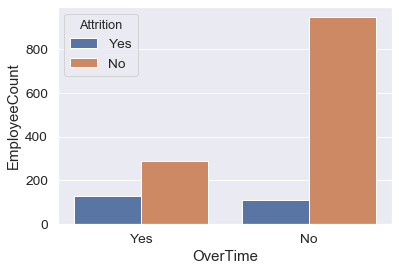

In [679]:
sns.barplot(x = hr_df['OverTime'], y = hr_df['EmployeeCount'], \
            estimator = np.sum, hue = hr_df['Attrition'] )

In [680]:
get_attrition_percentage(hr_df, 'OverTime', hr_df.OverTime.unique())

 Attrition Rate Column : OverTime  field :  Yes Percentage :  30.53 %
 Attrition Rate Column : OverTime  field :  No Percentage :  10.44 %


## Attrition based on Number of Companies Worked

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3])

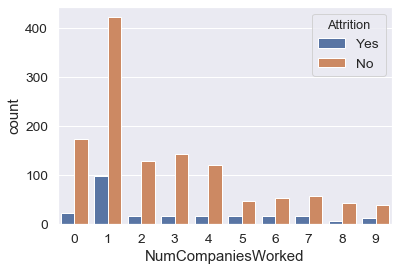

In [681]:
sns.countplot(x="NumCompaniesWorked", hue="Attrition", data=hr_df)
hr_df.NumCompaniesWorked.unique()

# Correlation Matrix

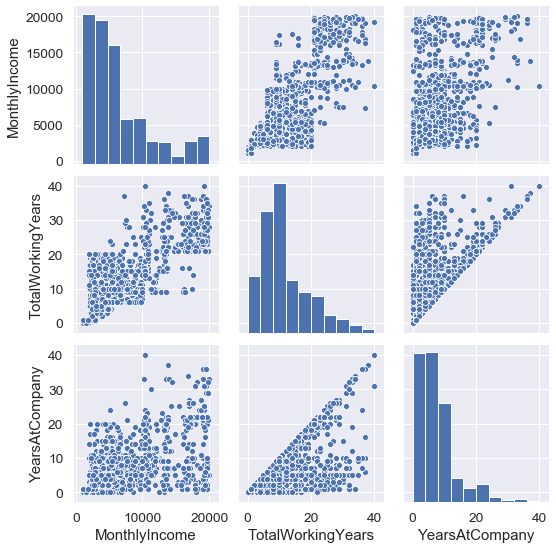

In [682]:
# Visualizing relations between all major variables
cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
sns.pairplot(hr_df[cols])

## Attrition rate based on Monthly Income & Total Working Years

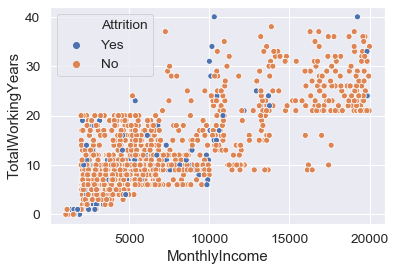

In [683]:
sns.scatterplot(x= hr_df['MonthlyIncome'], y = hr_df['TotalWorkingYears'], hue = hr_df['Attrition'])

# Feature selection

## Delete Unused columns

In [684]:
hr_df.drop(columns=['DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'Gender'], \
           axis=1, inplace=True)

## Process Categorical Variable


In [685]:
#Categorical Variable
print('Categorical Coulmns : ', list(hr_df.select_dtypes(include=['object']).columns))

Categorical Coulmns :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


<b>NOMINAL : Attrition, BusinessTravel, Department, EducationField, Gender, MaritalStatus, OverTime, JobRole<b><br>
<b>ORDINAL : JobRole [Tentitive]</b>

In [686]:
#Job Role Nominal or ordinal
hr_df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [687]:
#Copy only categorical variable to perform operaion on it.
hr_cat_df = hr_df.select_dtypes(include=['object']).copy()
hr_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   JobRole         1470 non-null   object
 5   MaritalStatus   1470 non-null   object
 6   OverTime        1470 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


In [688]:
#Convert Object to Category as Datatype to process
hr_cat_df['BusinessTravel'] = hr_cat_df['BusinessTravel'].astype('category')
hr_cat_df['Attrition']      = hr_cat_df['Attrition'].astype('category')
hr_cat_df['Department']     = hr_cat_df['Department'].astype('category')
hr_cat_df['EducationField'] = hr_cat_df['EducationField'].astype('category')
hr_cat_df['JobRole']        = hr_cat_df['JobRole'].astype('category')
hr_cat_df['MaritalStatus']  = hr_cat_df['MaritalStatus'].astype('category')
hr_cat_df['OverTime']       = hr_cat_df['OverTime'].astype('category')

In [689]:
#To Confirm if Object type converted to category
hr_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Attrition       1470 non-null   category
 1   BusinessTravel  1470 non-null   category
 2   Department      1470 non-null   category
 3   EducationField  1470 non-null   category
 4   JobRole         1470 non-null   category
 5   MaritalStatus   1470 non-null   category
 6   OverTime        1470 non-null   category
dtypes: category(7)
memory usage: 11.3 KB


In [690]:
#Copy Original dataframe to other dataframe
hr_final_df = hr_df.copy() 
hr_final_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [691]:
hr_final_df.shape

(1470, 29)

In [692]:
#Apply Feature Engineering Technique.
#Replacing values Method
hr_final_df['BusinessTravel'] = hr_cat_df['BusinessTravel'].cat.codes
hr_final_df['Attrition'] = hr_cat_df['Attrition'].cat.codes
hr_final_df['Department'] = hr_cat_df['Department'].cat.codes
hr_final_df['EducationField'] = hr_cat_df['EducationField'].cat.codes
hr_final_df['JobRole'] = hr_cat_df['JobRole'].cat.codes
hr_final_df['MaritalStatus'] = hr_cat_df['MaritalStatus'].cat.codes
hr_final_df['OverTime'] = hr_cat_df['OverTime'].cat.codes

#hr_final_df["Attrition"].replace({"Yes": 0, "No": 1}, inplace=True)

In [693]:
hr_final_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,2,1,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,1,1,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,4,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,4,1,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,1,3,1,40,3,...,3,4,1,6,3,3,2,2,2,2


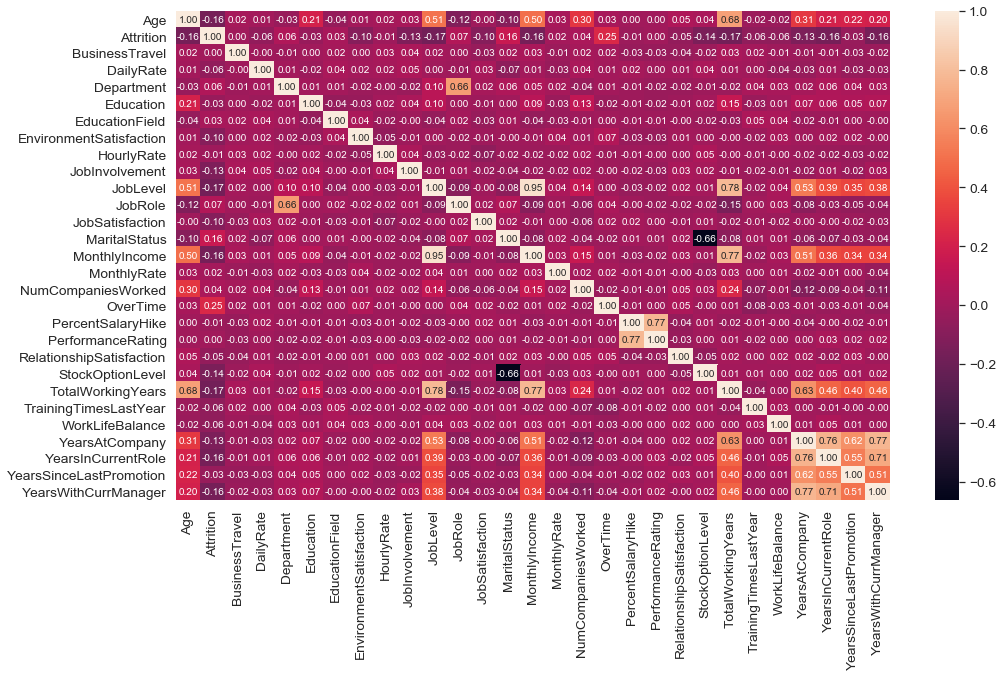

In [694]:
#Correlation betn all columns
corr = hr_final_df.corr()
f,ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr, cbar = True ,annot = True,fmt ='.2f',annot_kws ={'size':10})

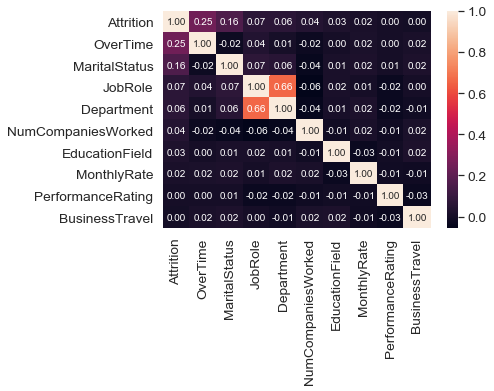

In [695]:
#Top 10 correlated columns
k=10
cols=corr.nlargest(k,'Attrition')['Attrition'].index
cm= np.corrcoef(hr_final_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar = True ,annot = True,fmt ='.2f',annot_kws ={'size':10},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# DATA SCIENCE METRIC
<BR><B>CONFUSION MATRIX</B>
<br>
<left><img src=./image/CONF1.png alt="CONFUSION_MATRIX" style="width: 400px;"/></left>


# Decision Metric : Recall
<br>


In [696]:
hr_final_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,2,1,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,1,1,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,4,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,4,1,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,1,3,1,40,3,...,3,4,1,6,3,3,2,2,2,2


# Model Evaluation

In [697]:
X.shape

(1470, 28)

## Logistic Regression with 28 features.

(1470, 28)
Accuracy on test data: 0.8412698412698413
Confusion Matrix: 
 [[371   0]
 [ 70   0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

Prediction for 20 observation:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual values for 20 observation:  [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0]
ROC AUC SCORE:  0.5
ROC AUC FPR:  [0. 0. 1.]
ROC AUC TPR:  [0. 1. 1.]
ROC AUC THRESHOLD:  [2 1 0]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


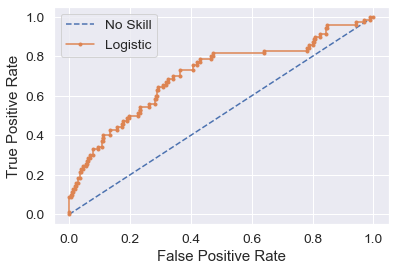

In [698]:
X = hr_final_df.drop(['Attrition'],axis=1)
y = hr_final_df['Attrition']
print(X.shape)
X.head()
evaluate_logistic_regresstion(X, y, 0.3, 101)

## Remove Correlated features above 0.75 and then apply logistic model

Columns to be dropped: 
['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']
(1470, 23)
Accuracy on test data: 0.8503401360544217
Confusion Matrix: 
 [[368   3]
 [ 63   7]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       371
           1       0.70      0.10      0.17        70

    accuracy                           0.85       441
   macro avg       0.78      0.55      0.55       441
weighted avg       0.83      0.85      0.80       441

Prediction for 20 observation:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Actual values for 20 observation:  [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0]
ROC AUC SCORE:  0.5459568733153639
ROC AUC FPR:  [0. 0. 1.]
ROC AUC TPR:  [0. 1. 1.]
ROC AUC THRESHOLD:  [2 1 0]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


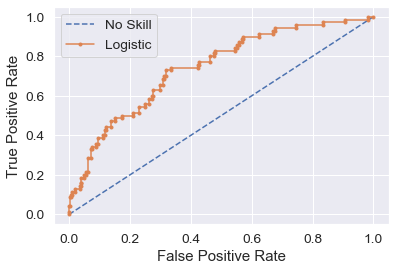

In [699]:
# Copy df in new variable df1
df1 = hr_final_df.copy()
evaluate_regr_without_corr(df1, 'LogisticRegression')

## Using CHI-SQUARE

(1470, 29)
For no of features= 10 , score= 0.8616780045351474
For no of features= 15 , score= 0.8412698412698413
For no of features= 20 , score= 0.8458049886621315


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

For no of features= 23 , score= 0.8526077097505669
High Score is: 0.8616780045351474 with features= 10
Accuracy on test data: 0.8526077097505669
Confusion Matrix: 
 [[370  10]
 [ 55   6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.38      0.10      0.16        61

    accuracy                           0.85       441
   macro avg       0.62      0.54      0.54       441
weighted avg       0.80      0.85      0.81       441

Prediction for 20 observation:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual values for 20 observation:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
ROC AUC SCORE:  0.5360224331320105
ROC AUC FPR:  [0.         0.02631579 1.        ]
ROC AUC TPR:  [0.         0.09836066 1.        ]
ROC AUC THRESHOLD:  [2 1 0]


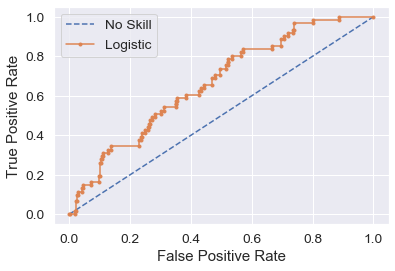

In [700]:
# Copy df in new variable df1
df1 = hr_final_df.copy()
print(df1.shape)
evaluate_log_regr_with_chi_square(df1)

## ANOVA

(1470, 29)
For no of features= 10 , score= 0.8616780045351474
For no of features= 15 , score= 0.8639455782312925
For no of features= 20 , score= 0.854875283446712


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

For no of features= 23 , score= 0.854875283446712
High Score is: 0.8639455782312925 with features= 15
Accuracy on test data: 0.854875283446712
Confusion Matrix: 
 [[371   9]
 [ 55   6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.40      0.10      0.16        61

    accuracy                           0.85       441
   macro avg       0.64      0.54      0.54       441
weighted avg       0.81      0.85      0.82       441

Prediction for 20 observation:     [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Actual values for 20 observation:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
ROC AUC SCORE:  0.5373382226056946
ROC AUC FPR:  [0.         0.02368421 1.        ]
ROC AUC TPR:  [0.         0.09836066 1.        ]
ROC AUC THRESHOLD:  [2 1 0]


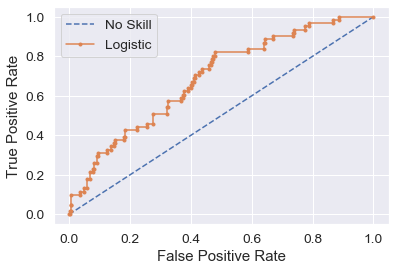

In [701]:
# Copy df in new variable df1
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_log_regr_with_Anova(df1)

## PCA

(1470, 29)
For no of features= 10 , score= 0.7414965986394558
For no of features= 15 , score= 0.7210884353741497
For no of features= 20 , score= 0.7573696145124716
For no of features= 23 , score= 0.7097505668934241


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

High Score is: 0.7573696145124716 with features= 20
Accuracy on test data: 0.7097505668934241
Confusion Matrix: 
 [[285  95]
 [ 33  28]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       380
           1       0.23      0.46      0.30        61

    accuracy                           0.71       441
   macro avg       0.56      0.60      0.56       441
weighted avg       0.80      0.71      0.75       441

Prediction for 20 observation:     [0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
Actual values for 20 observation:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
ROC AUC SCORE:  0.6045081967213115
ROC AUC FPR:  [0.   0.25 1.  ]
ROC AUC TPR:  [0.         0.45901639 1.        ]
ROC AUC THRESHOLD:  [2 1 0]


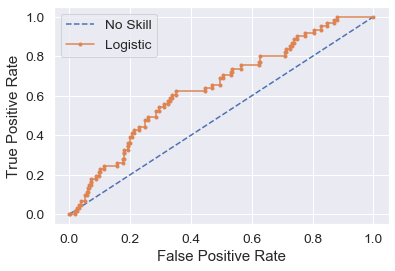

In [702]:
# Copy df in new variable df1
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_log_regr_with_PCA(df1)

## Under Sampling

(1470, 29)
Number of class before fit Counter({0: 862, 1: 167})
Number of class after fit Counter({0: 334, 1: 167}) 


/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


[[243 128]
 [ 33  37]]
0.6349206349206349
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       371
           1       0.22      0.53      0.31        70

    accuracy                           0.63       441
   macro avg       0.55      0.59      0.53       441
weighted avg       0.78      0.63      0.68       441

Prediction for 20 observation:     [1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0]
Actual values for 20 observation:  [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0]
ROC AUC SCORE:  0.5917789757412398
ROC AUC FPR:  [0.         0.34501348 1.        ]
ROC AUC TPR:  [0.         0.52857143 1.        ]
ROC AUC THRESHOLD:  [2 1 0]


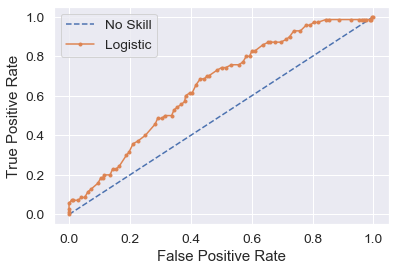

In [703]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_with_undersample(df1)

## Over Sampling

(1470, 29)
Number of class before fit Counter({0: 862, 1: 167})
Number of class after fit Counter({0: 862, 1: 689}) 


/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


[[360  11]
 [ 52  18]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       371
           1       0.62      0.26      0.36        70

    accuracy                           0.86       441
   macro avg       0.75      0.61      0.64       441
weighted avg       0.83      0.86      0.83       441

ROC AUC SCORE:  0.6137466307277628
ROC AUC FPR:  [0.        0.0296496 1.       ]
ROC AUC TPR:  [0.         0.25714286 1.        ]
ROC AUC THRESHOLD:  [2 1 0]


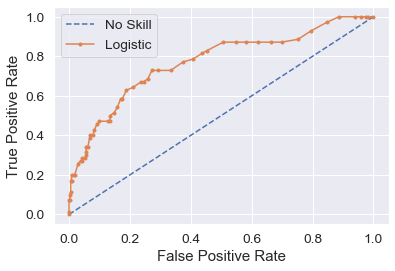

In [704]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_with_oversample(df1)

## Random Forest

(1470, 29)
[[369   2]
 [ 57  13]]
0.8662131519274376
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       371
           1       0.87      0.19      0.31        70

    accuracy                           0.87       441
   macro avg       0.87      0.59      0.62       441
weighted avg       0.87      0.87      0.83       441

ROC AUC SCORE:  0.5901617250673854


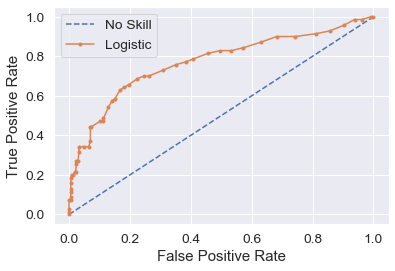

In [705]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_with_random_forrest(df5)

## Decision Tree [GINI INDEX]

(1470, 29)
[[325  52]
 [ 43  21]]
0.7845804988662132
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       377
           1       0.29      0.33      0.31        64

    accuracy                           0.78       441
   macro avg       0.59      0.60      0.59       441
weighted avg       0.80      0.78      0.79       441

ROC AUC SCORE:  0.5950969827586207
Prediction for 20 observation:     [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
Actual values for 20 observation:  [0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1]


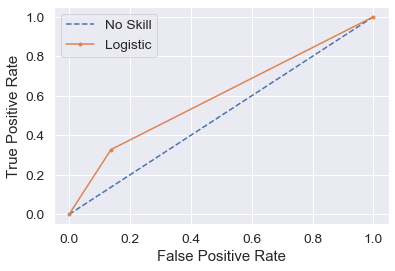

In [706]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_with_decision_tree(df1, 'gini')

## Decision Tree [Entropy]

(1470, 29)
[[314  66]
 [ 35  26]]
0.7709750566893424
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       380
           1       0.28      0.43      0.34        61

    accuracy                           0.77       441
   macro avg       0.59      0.63      0.60       441
weighted avg       0.81      0.77      0.79       441

ROC AUC SCORE:  0.6262726488352028
Prediction for 20 observation:     [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]
Actual values for 20 observation:  [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


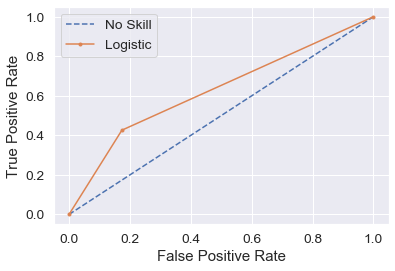

In [707]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_with_decision_tree(df1, 'entropy')

# Remove Correlated features above 0.75 and then apply Decision Tree




(1470, 29)
Columns to be dropped: 
['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']
(1470, 23)
[[323  62]
 [ 33  23]]
0.7845804988662132
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       385
           1       0.27      0.41      0.33        56

    accuracy                           0.78       441
   macro avg       0.59      0.62      0.60       441
weighted avg       0.83      0.78      0.80       441

ROC AUC SCORE:  0.6248376623376622
Prediction for 20 observation:     [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
Actual values for 20 observation:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


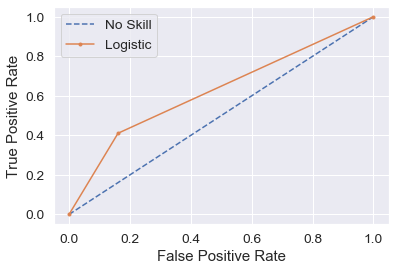

In [708]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_regr_without_corr(df1, 'DecisionTreeClassifier')

# Remove Correlated features above 0.75 and then apply Random Forest Classifier



(1470, 29)
Columns to be dropped: 
['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']
(1470, 23)
[[369   2]
 [ 58  12]]
0.8639455782312925
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.86      0.17      0.29        70

    accuracy                           0.86       441
   macro avg       0.86      0.58      0.61       441
weighted avg       0.86      0.86      0.82       441

ROC AUC SCORE:  0.5830188679245283
Prediction for 20 observation:     [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]
Actual values for 20 observation:  [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1]


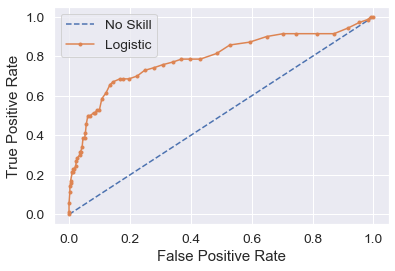

In [716]:
df1 = hr_final_df.copy()
print(df1.shape)

evaluate_regr_without_corr(df1, 'RandomForestClassifier')

# COMMON FUNCTIONS
